In [2]:
%matplotlib inline

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pylab

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

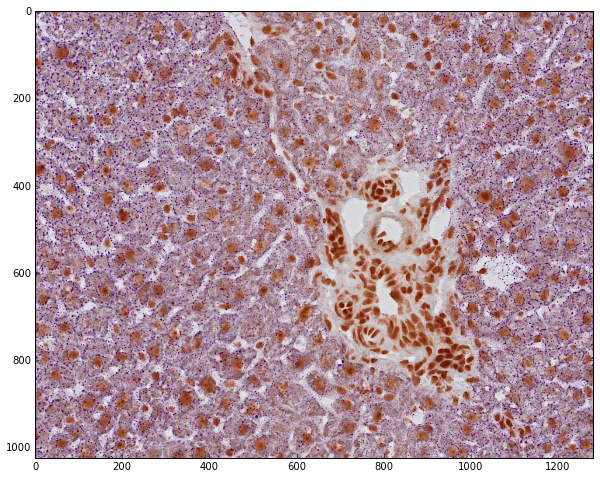

In [4]:
#INFLAMMATION ANALYSIS

img = cv2.imread("GImage (22).tif")
plt.imshow(img)
plt.show()

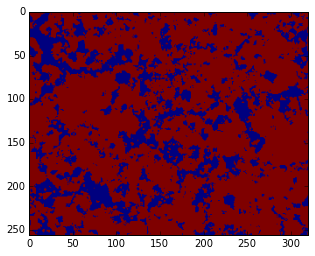

109.582769861


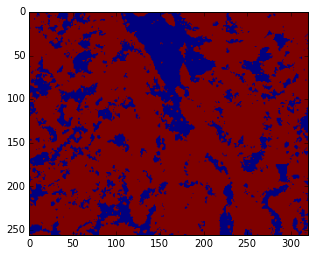

108.921733141


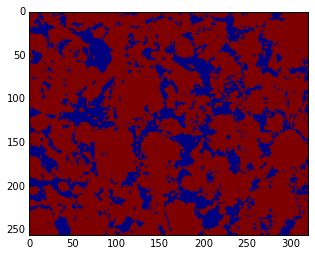

110.403857863


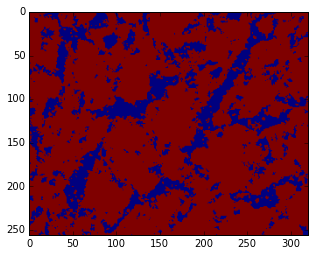

105.272335824


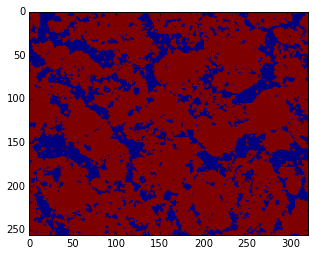

111.408205785


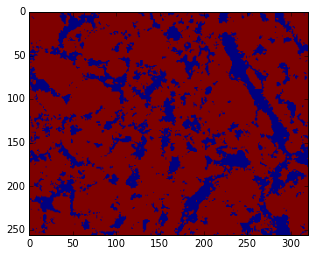

106.395225377


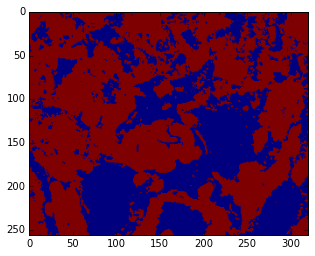

124.760632486


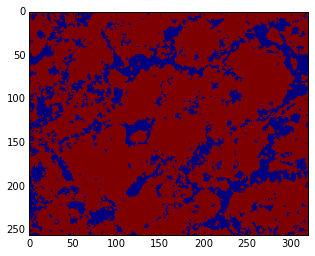

107.062456412


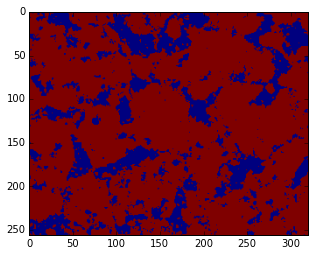

105.526594954


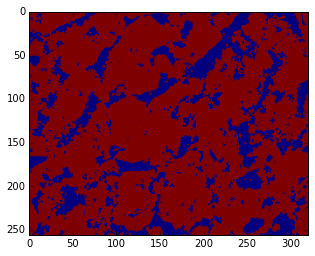

106.649111148


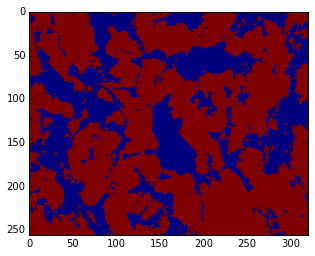

120.859913734


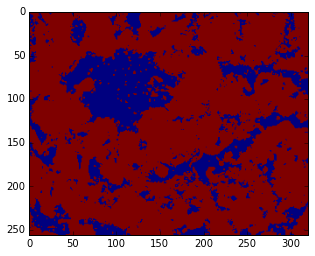

108.365389219


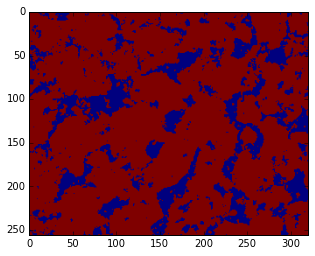

101.899475068


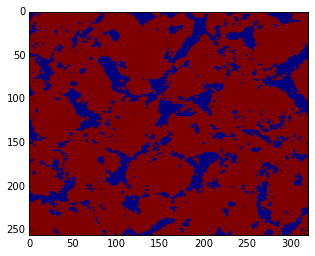

102.59052373


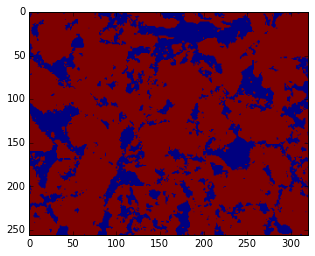

109.994485155


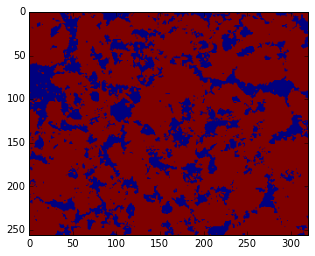

107.935879216


In [4]:
#Threshold for nucleus, look for std dev in blocks (4x4)

thresh = cv2.inRange(img, (0,0,0), (255,180,180))  #BGR, not RGB
#plt.imshow(thresh)
#plt.show()

total = 0

r = thresh.shape[0]/4
c = thresh.shape[1]/4
locations=[]
for i in range(4):
    for j in range(4):
        frame = thresh[i*r:(i+1)*r, j*c:(j+1)*c]
        plt.imshow(frame)
        plt.show()
        print np.std(frame)
                    

[INFO] 331 unique segments found


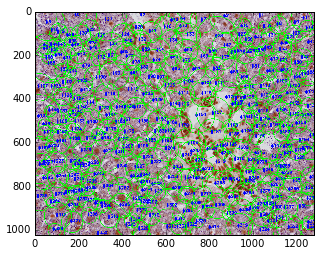

In [5]:
#Watershed, find contours, count number of nucleus per block (4x4)
#Watershed example from http://www.pyimagesearch.com/2015/11/02/watershed-opencv/


# import the necessary packages
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import cv2

shifted = cv2.pyrMeanShiftFiltering(img, 21, 51)
plt.imshow(img)


# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

#thresh = cv2.inRange(img, (0,0,0), (180,180,255))
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20, labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue
 
    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
 
    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)[-2]
    c = max(cnts, key=cv2.contourArea)
 
    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(img, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv2.putText(img, "#{}".format(label), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    
plt.imshow(img)
plt.show()

In [6]:
# Find ration of contours from threshold
# if evenly distributed, not inflammation

img = cv2.imread("GImage (10).tif")
thresh = cv2.inRange(img, (0,0,0), (180,180,255))
contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (255,0,0), 2)
cv2.imshow("contours", img)
cv2.waitKey(-1)

-1

In [7]:
img = cv2.imread("GImage (22).tif")
thresh = cv2.inRange(img, (0,0,0), (180,180,255))
contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, (255,0,0), 2)
cv2.imshow("contours", img)
cv2.waitKey(-1)

-1

In [8]:
# BROWN STAIN

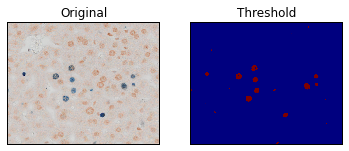

In [9]:
# Thresholds for brown, find contours and draws contours if they fit circularity factor threshold and area threshold

img = cv2.imread("Image73.tif")
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
thresh = cv2.inRange(img, (0,0,0), (160,180,180))
plt.subplot(122), plt.imshow(thresh)
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if ((4*np.pi*area)/(perimeter*perimeter) >= 0.1 and area >= 500):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

brown_blobs = len(brown_stain_blobs)

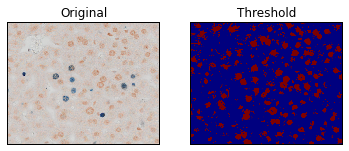

-1

In [10]:
img = cv2.imread("Image73.tif")
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
thresh = cv2.inRange(img, (0,0,0), (255,200,180))
plt.subplot(122), plt.imshow(thresh)
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if (area >= 500):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

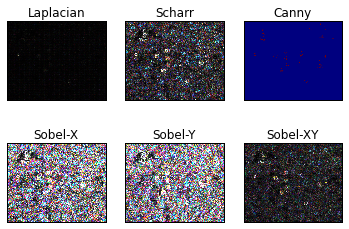

In [11]:
img = cv2.imread("Image73.tif")

edge2 = cv2.Canny(img, 0, 255)
edge22 = cv2.Sobel(img, cv2.CV_64F,1,0, ksize=5)
scale22 = cv2.convertScaleAbs(edge22)
edge222 = cv2.Sobel(img, cv2.CV_64F,0,1, ksize=5)
scale222 = cv2.convertScaleAbs(edge222)
edge2222 = cv2.Sobel(img, cv2.CV_64F, 1,1, ksize=5)
scale2222 = cv2.convertScaleAbs(edge2222)
edge = cv2.Laplacian(img, cv2.CV_64F)
scale = cv2.convertScaleAbs(edge)
edge1 = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scale1 = cv2.convertScaleAbs(edge1)


plt.subplot(2,3,1), plt.imshow(scale)
plt.title("Laplacian"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2), plt.imshow(scale1)
plt.title("Scharr"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3), plt.imshow(edge2)
plt.title("Canny"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4), plt.imshow(scale22)
plt.title("Sobel-X"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5), plt.imshow(scale222)
plt.title("Sobel-Y"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6), plt.imshow(scale2222)
plt.title("Sobel-XY"), plt.xticks([]), plt.yticks([])
plt.show()

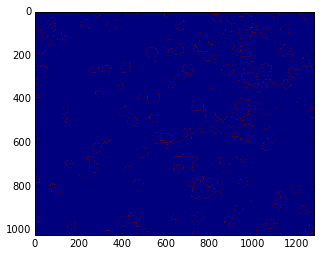

In [12]:
#stackoverflow.com/questions/11294859/how-to-define-the-markers-for-watershed-in-opencv

#WATERSHED ATTEMPT

from scipy.ndimage import label

def segment_on_dt(a, img):
    border = cv2.dilate(img, None, iterations = 5)              #change later # of iterations
    border = border - cv2.erode(border, None)
    
    dt = cv2.distanceTransform(img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(np.uint8)
    _, dt = cv2.threshold(dt, 50, 255, cv2.THRESH_BINARY)
    lbl, ncc = label(dt)
    lbl = lbl * (255/ncc)
    #completing markers now
    lbl[border == 255] = 255
    
    lbl = lbl.astype(np.int32)
    cv2.watershed(a, lbl)
    
    lbl[lbl==-1] = 0
    lbl = lbl.astype(np.uint8)
    return 255 - lbl

img = cv2.imread("Image73.tif")
#Preprocessing
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, np.ones((3,3), dtype=int))
result = segment_on_dt(img, img_bin)
result[result!= 255] = 0

plt.imshow(result)
plt.show()

#cv2.imshow("Watershed", result)
#cv2.waitKey(-1)

In [13]:
contours, heirarchy = cv2.findContours(result, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if ((4*np.pi*area)/(perimeter*perimeter) >= 0.3 and area > 500):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, contours, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

-1

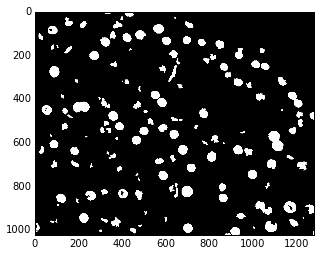

-1

In [14]:
#stackoverflow.com/questions/11294859/how-to-define-the-markers-for-watershed-in-opencv

#WATERSHED ATTEMPT

img = cv2.imread("Image75.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fg = cv2.erode(thresh, None, iterations = 2)
bgt = cv2.dilate(thresh, None, iterations = 3)
ret, bg = cv2.threshold(bgt, 1, 128, 1)

marker = cv2.add(fg, bg)
marker32 = np.int32(marker)

cv2.watershed(img, marker32)
m = cv2.convertScaleAbs(marker32)

ret, thresh = cv2.threshold(m , 0 , 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
res = cv2.bitwise_and(img, img, mask = thresh)
res = 255 - res
res[res != 255] = 0

plt.imshow(res)
plt.show()
res = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
contours, heirarchy = cv2.findContours(res, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if ((4*np.pi*area)/(perimeter*perimeter) >= 0.2 and area > 500):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

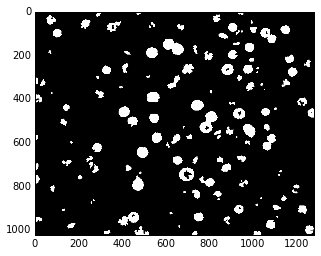

-1

In [15]:
#stackoverflow.com/questions/11294859/how-to-define-the-markers-for-watershed-in-opencv

#WATERSHED ATTEMPT

img = cv2.imread("Image73.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fg = cv2.erode(thresh, None, iterations = 2)
bgt = cv2.dilate(thresh, None, iterations = 3)
ret, bg = cv2.threshold(bgt, 1, 128, 1)

marker = cv2.add(fg, bg)
marker32 = np.int32(marker)

cv2.watershed(img, marker32)
m = cv2.convertScaleAbs(marker32)

ret, thresh = cv2.threshold(m , 0 , 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
res = cv2.bitwise_and(img, img, mask = thresh)
res = 255 - res
res[res != 255] = 0

plt.imshow(res)
plt.show()
res = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
contours, heirarchy = cv2.findContours(res, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if ((4*np.pi*area)/(perimeter*perimeter) >= 0.2 and area > 500):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

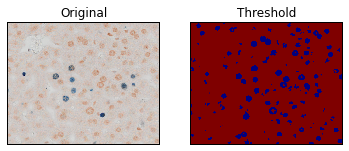

TypeError: image is not a numerical tuple

In [16]:
img = cv2.imread("Image73.tif")
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
thresh = cv2.inRange(img, (0,50,50), (255,180,200)),plt.subplot(122), plt.imshow(thresh)
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if ((4*np.pi*area)/(perimeter*perimeter) >= 0.4 and area > 500):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

In [17]:
contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print len(contours)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if ((4*np.pi*area)/(perimeter*perimeter) >= 0.4 and area > 500):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

TypeError: image is not a numerical tuple

In [18]:
img = cv2.imread("Image73.tif",0)
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 2)
_, thresh = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY)
thresh = 255 - thresh
contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if ((4*np.pi*area)/(perimeter*perimeter) >= 0.2 and area > 300):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0), 2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

-1

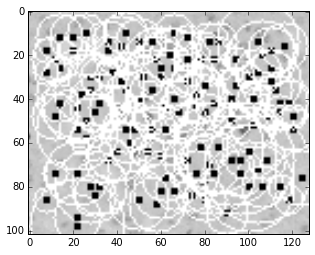

In [19]:
# Would not recommend hough circle for this problem

img = cv2.imread("Image73.tif",0)
crop= cv2.resize(img, (128,102))
circles = cv2.HoughCircles(crop, cv2.cv.CV_HOUGH_GRADIENT, 1, 5, param1 = 60, param2 = 20, minRadius = 0, maxRadius = 0)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x,y,r) in circles:
        cv2.circle(crop, (x,y), r, (255,0,0), 1)
        cv2.rectangle(crop, (x-1,y-1), (x+1, y+1), (0,128,255), -1)
        
plt.imshow(crop, cmap='gray')
plt.show()

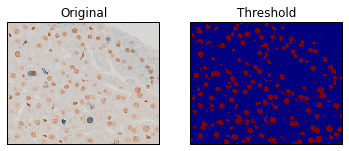

-1

In [20]:
#Currently best thresholding so far
#Need to separate connected components and then not detect immune cells

img = cv2.imread("Image75.tif")
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
thresh = cv2.inRange(img, (0,0,0), (255,200,180))
plt.subplot(122), plt.imshow(thresh)
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if (area >= 500):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

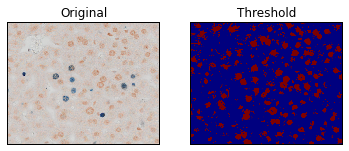

-1

In [21]:
#Currently best thresholding so far
#Need to separate connected components and then not detect immune cells

img = cv2.imread("Image73.tif")
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
thresh = cv2.inRange(img, (0,0,0), (255,200,180))
plt.subplot(122), plt.imshow(thresh)
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if (area >= 500):
            brown_stain_blobs.append(cnt)
            
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

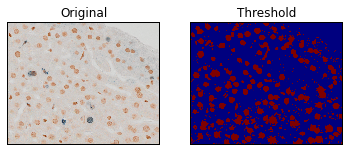

In [22]:
img = cv2.imread("Image75.tif")
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
thresh = cv2.inRange(erosion, (0,0,0), (255,200,180))
plt.subplot(122), plt.imshow(thresh)
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.show()
contours, heirarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
brown_stain_blobs = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    if (perimeter != 0.0):
        if ((4*np.pi*area)/(perimeter*perimeter) >= 0.35 and area >= 500):
            brown_stain_blobs.append(cnt)
            
#dilation = cv2.dilate(erosion, kernel, iterations = 2)
cv2.drawContours(img, brown_stain_blobs, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

total_blobs = len(brown_stain_blobs)

In [23]:
print "Number of Brown Blobs:", brown_blobs
print "Number of Total Blobs:", total_blobs
print "Brown / Total Blobs:", (brown_blobs * 100) / total_blobs, "%"

Number of Brown Blobs: 10
Number of Total Blobs: 109
Brown / Total Blobs: 9 %


In [24]:
#Code originally used for video feed, unsure on how to fix error with min_element

import sys
import cv2
import math
import numpy
from scipy.ndimage import label

pi_4 = 4*math.pi

def segment_on_dt(img):
    border = img - cv2.erode(img, None)

    dt = cv2.distanceTransform(255 - img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(numpy.uint8)
    _, dt = cv2.threshold(dt, 100, 255, cv2.THRESH_BINARY)

    lbl, ncc = label(dt)
    lbl[border == 255] = ncc + 1

    lbl = lbl.astype(numpy.int32)
    cv2.watershed(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), lbl)
    lbl[lbl < 1] = 0
    lbl[lbl > ncc] = 0

    lbl = lbl.astype(numpy.uint8)
    lbl = cv2.erode(lbl, None)
    lbl[lbl != 0] = 255
    return lbl


def find_circles(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    frame_gray = cv2.GaussianBlur(frame_gray, (5, 5), 2)

    edges = frame_gray - cv2.erode(frame_gray, None)
    _, bin_edge = cv2.threshold(edges, 0, 255, cv2.THRESH_OTSU)
    height, width = bin_edge.shape
    mask = numpy.zeros((height+2, width+2), dtype=numpy.uint8)
    cv2.floodFill(bin_edge, mask, (0, 0), 255)

    components = segment_on_dt(bin_edge)

    circles, obj_center = [], []
    contours, _ = cv2.findContours(components,
            cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        c = c.astype(numpy.int64) # XXX OpenCV bug.
        area = cv2.contourArea(c)
        if 100 < area:
            arclen = cv2.arcLength(c, True)
            circularity = (pi_4 * area) / (arclen * arclen)
            if circularity > 0.5: # XXX Yes, pretty low threshold.
                circles.append(c)
                box = cv2.boundingRect(c)
                obj_center.append((box[0] + (box[2] / 2), box[1] + (box[3] / 2)))

    return circles, obj_center

def track_center(objcenter, newdata):
    for i in xrange(len(objcenter)):
        ostr, oc = objcenter[i]
        best = min((abs(c[0]-oc[0])**2+abs(c[1]-oc[1])**2, j)
                for j, c in enumerate(newdata))
        j = best[1]
        if i == j:
            objcenter[i] = (ostr, new_center[j])
        else:
            print "Swapping %s <-> %s" % ((i, objcenter[i]), (j, objcenter[j]))
            objcenter[i], objcenter[j] = objcenter[j], objcenter[i]


video = cv2.imread("Image75.tif")

obj_center = None
while True:
    frame = video

    circles, new_center = find_circles(frame)
    if obj_center is None:
        obj_center = [(str(i + 1), c) for i, c in enumerate(new_center)]
    else:
        track_center(obj_center, new_center)

    for i in xrange(len(circles)):
        cv2.drawContours(frame, circles, i, (0, 255, 0))
        cstr, ccenter = obj_center[i]
        cv2.putText(frame, cstr, ccenter, cv2.FONT_HERSHEY_COMPLEX, 0.5,
                (255, 255, 255), 1, cv2.CV_AA)

    cv2.imshow("result", frame)
    cv2.waitKey()
    if len(circles[0]) < 5:
        print "lost something"

ValueError: min() arg is an empty sequence

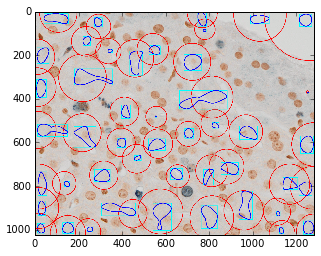

In [25]:
im = cv2.imread('Image75.tif')
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
th, bw = cv2.threshold(hsv[:, :, 2], 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
morph = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
dist = cv2.distanceTransform(morph, cv2.cv.CV_DIST_L2, cv2.cv.CV_DIST_MASK_PRECISE)
borderSize = 75
distborder = cv2.copyMakeBorder(dist, borderSize, borderSize, borderSize, borderSize, 
                                cv2.BORDER_CONSTANT | cv2.BORDER_ISOLATED, 0)
gap = 10                                
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*(borderSize-gap)+1, 2*(borderSize-gap)+1))
kernel2 = cv2.copyMakeBorder(kernel2, gap, gap, gap, gap, 
                                cv2.BORDER_CONSTANT | cv2.BORDER_ISOLATED, 0)
distTempl = cv2.distanceTransform(kernel2, cv2.cv.CV_DIST_L2, cv2.cv.CV_DIST_MASK_PRECISE)
nxcor = cv2.matchTemplate(distborder, distTempl, cv2.TM_CCOEFF_NORMED)
mn, mx, _, _ = cv2.minMaxLoc(nxcor)
th, peaks = cv2.threshold(nxcor, mx*0.5, 255, cv2.THRESH_BINARY)
peaks8u = cv2.convertScaleAbs(peaks)
contours, hierarchy = cv2.findContours(peaks8u, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
peaks8u = cv2.convertScaleAbs(peaks)    # to use as mask
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    _, mx, _, mxloc = cv2.minMaxLoc(dist[y:y+h, x:x+w], peaks8u[y:y+h, x:x+w])
    cv2.circle(im, (int(mxloc[0]+x), int(mxloc[1]+y)), int(mx), (255, 0, 0), 2)
    cv2.rectangle(im, (x, y), (x+w, y+h), (0, 255, 255), 2)
    cv2.drawContours(im, contours, i, (0, 0, 255), 2)

plt.imshow(im)
plt.show()

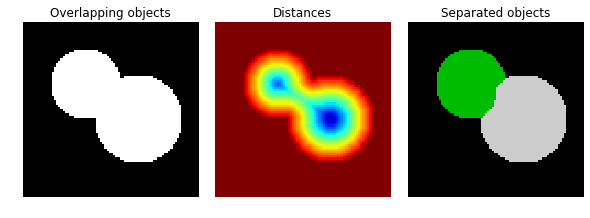

In [26]:
#Unsure of how to use this code with an image, code uses hard coded indices

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.7), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax0, ax1, ax2 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title('Overlapping objects')
ax1.imshow(-distance, cmap=plt.cm.jet, interpolation='nearest')
ax1.set_title('Distances')
ax2.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax2.set_title('Separated objects')

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

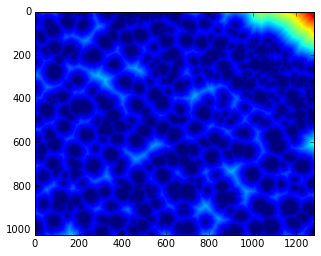

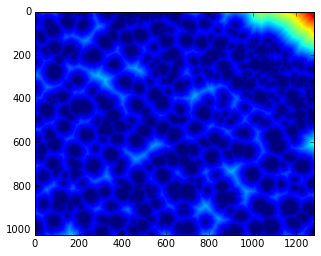

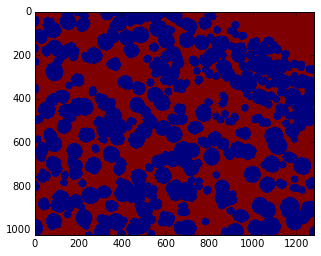

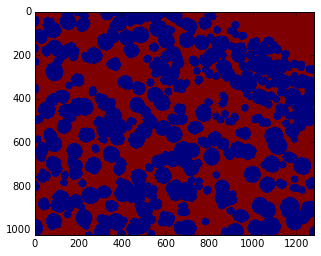

TypeError: 'long' object is not callable

In [27]:
# Issues with RNG Uniform -- thinks b is a function/long when supposed to be int

img = cv2.imread('Image75.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

dist = cv2.distanceTransform(thresh, cv2.cv.CV_DIST_L2, 3)
plt.imshow(dist)
plt.show()
dist = cv2.normalize(dist, 0, 1, cv2.NORM_MINMAX)
plt.imshow(dist)
plt.show()
ret, dst = cv2.threshold(dist, 0.0005, 1, cv2.THRESH_BINARY)
plt.imshow(dst)
plt.show()
dist8U = np.uint8(dst)
plt.imshow(dist8U)
plt.show()
contours, heirarchy = cv2.findContours(dist8U, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
ncomp = len(contours)

markers = np.zeros_like(dist, np.int32)

for i in range(ncomp):
    cv2.drawContours(markers, contours, i, (i+1), -1)

cv2.circle(markers, (5,5), 3, (255,255,255), -1)
markers = cv2.watershed(img, markers)
colors = []

for i in range(ncomp):
    b = cv2.RNG_UNIFORM(0,255)
    g = cv2.RNG_UNIFORM(0,255)
    r = cv2.RNG_UNIFORM(0,255)
    
colors.append(b,g,r)
dst = np.zeros_like(markers, np.uint8)

for i in range(markers.rows):
    for j in range(markers.cols):
        index = markers[i,j]
        if (index > 0) and (index <= ncomp):
            dst[i,j] = colors[index-1]
        else:
            dst[i,j] = [0,0,0]
            
plt.imshow(dst)
plt.show()
            

In [ ]:
# cv2.connectedcomponents does not exist in version 2.4.9 so unable to continue with this example
# Could be possible to use personal connected components algorithm but unsure how to produce output of ret, markers

img = cv2.imread("Image75.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

sure_bg = cv2.dilate(opening, kernel, iterations = 3)
dist_transform = cv2.distanceTransform(opening, cv2.cv.CV_DIST_L2, 5);

ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.imshow(sure_fg)
plt.show()

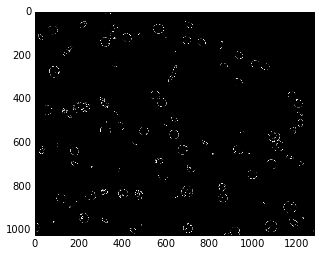

-1

In [28]:
img = cv2.imread("Image75.tif")
v = np.median(img)
sigma = 0.33

lower = int(max(0, (1.0-sigma)*v))
upper = int(min(255, (1.0+sigma)*v))
edged = cv2.Canny(img, lower, upper)

plt.imshow(edged, cmap = 'gray')
plt.show()

contours, heirarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img, contours, -1, (255,0,0),2)
cv2.imshow("Contours", img)
cv2.waitKey(-1)

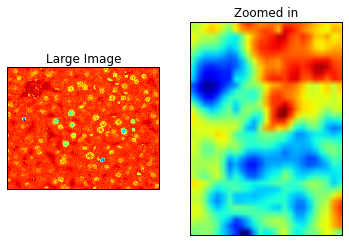

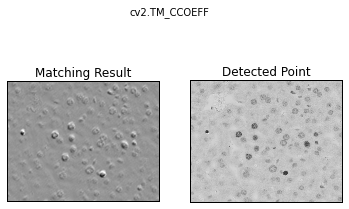

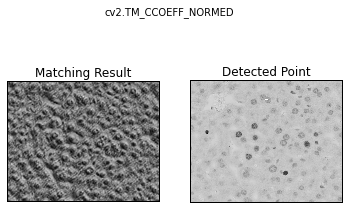

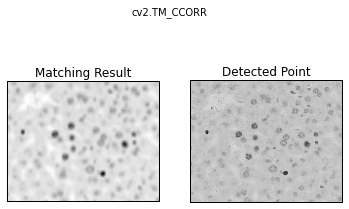

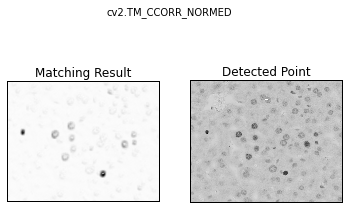

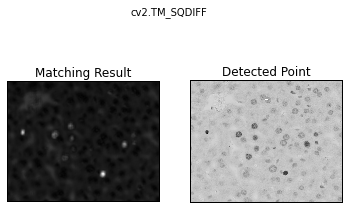

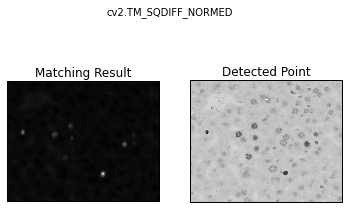

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Image73.tif',0)
template = img[135:170, 625:650]
plt.subplot(121), plt.imshow(img)
plt.title("Large Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(template)
plt.title("Zoomed in"), plt.xticks([]), plt.yticks([])
plt.show()

img2 = img.copy()
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, (255,0,0), 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

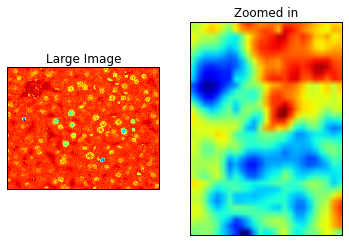

In [30]:
img = cv2.imread('Image73.tif',0)
template = img[135:170, 625:650]
plt.subplot(121), plt.imshow(img)
plt.title("Large Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(template)
plt.title("Zoomed in"), plt.xticks([]), plt.yticks([])
plt.show()

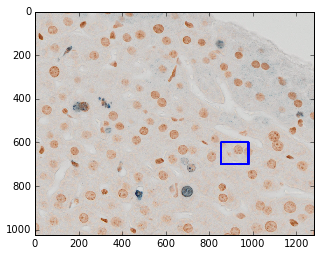

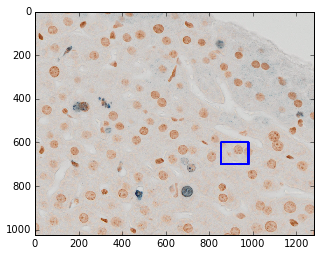

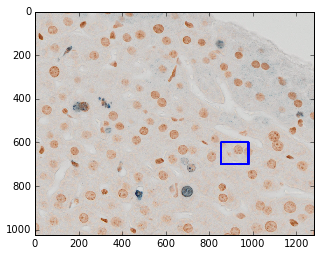

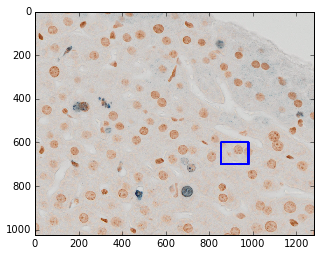

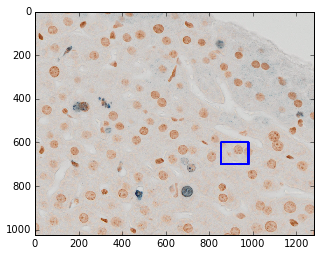

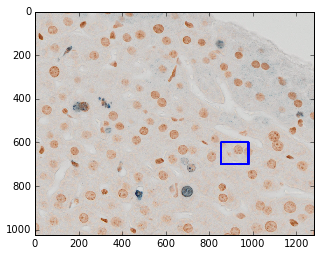

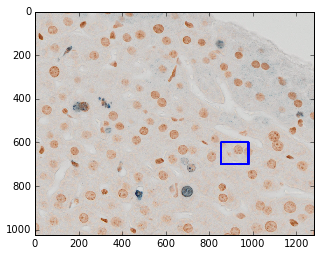

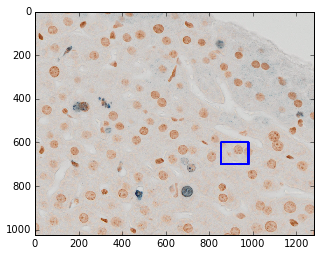

In [31]:
img_rgb = cv2.imread('Image75.tif')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[600:700, 850:975]

rows, cols = template.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2), 90,1)
N = cv2.getRotationMatrix2D((cols/2,rows/2), 180,1)
O = cv2.getRotationMatrix2D((cols/2,rows/2), 270,1)


P = cv2.warpAffine(template, M, (cols,rows))
Q = cv2.warpAffine(template, N, (cols,rows))
R = cv2.warpAffine(template, O, (cols,rows))


w, h = template.shape[::-1]

res1 = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
res2 = cv2.matchTemplate(img_gray,P,cv2.TM_CCOEFF_NORMED)
res3 = cv2.matchTemplate(img_gray,Q,cv2.TM_CCOEFF_NORMED)
res4 = cv2.matchTemplate(img_gray,R,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

threshold = 0.8
loc = np.where( res2 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()


threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res3 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()
threshold = 0.8
loc = np.where( res4 >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.show()

In [32]:
newImg = cv2.imread("Image75.tif")
img = cv2.imread("Image76.tif",0)
img = np.uint8(img)
img = 255 - img
contours, h = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

areaArray = []
count = 1
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    areaArray.append(area)

c = []
sorteddata = sorted(zip(areaArray, contours), key=lambda x: x[0], reverse=True)
for i in range(len(sorteddata)):
    cnt = sorteddata[i][1]
    area = cv2.contourArea(cnt)
    if (area >= 100.0):
        perimeter = cv2.arcLength(cnt, True)
        if (perimeter != 0.0):
            if ((4*np.pi*area)/(perimeter*perimeter) >= 0.1):
                c.append(cnt)
            
if len(c) == 0:
    print "No bubble detected"
    plt.imshow(thresh)
    plt.show()
else:
    mask = np.zeros(img.shape, np.uint8)
    cv2.drawContours(newImg, c, -1, (255,255,0), 2)
    cv2.imshow("contours", newImg)
    cv2.waitKey(-1)

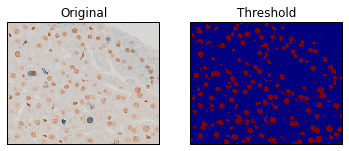

-1

In [33]:
#Variation of pyimagesearch
#Appears as though outputted several contour points

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

img = cv2.imread("Image75.tif")
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
thresh = cv2.inRange(img, (0,0,0), (255,200,180))
plt.subplot(122), plt.imshow(thresh)
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

c, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#cv2.drawContours(img, c, -1, (255,255,0), 2)
#cv2.imshow("contours", img)
#cv2.waitKey(-1)

D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices = False, min_distance = 20, labels = thresh)
markers = ndimage.label(localMax, structure = np.ones((3,3)))[0]
labels = watershed(-D, markers, mask = thresh)

for label in np.unique(labels):
    if label == 0:
        continue
    
    mask = np.zeros(thresh.shape, dtype = "uint8")
    mask[labels == label] = 255
    
    cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cn = max(cnts, key = cv2.contourArea)
    
    cv2.drawContours(img, cn, -1, (255,255,0), 2)
    
cv2.imshow("contours", img)
cv2.waitKey(-1) 

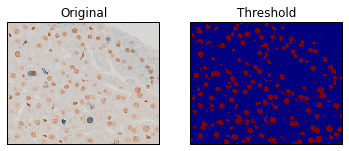

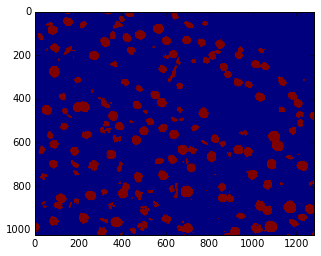

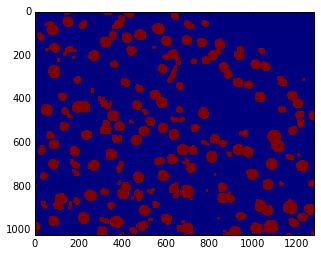

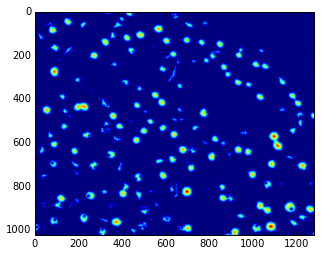

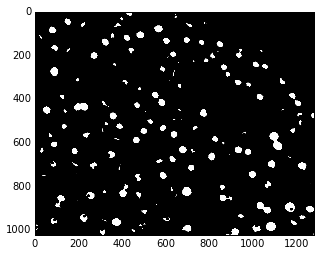

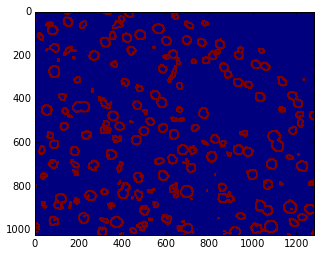

C:\Users\tzlab\Anaconda\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: using a boolean instead of an integer will result in an error in the future


In [34]:
img = cv2.imread("Image75.tif")
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
thresh = cv2.inRange(img, (0,0,0), (255,200,180))
plt.subplot(122), plt.imshow(thresh)
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.imshow(opening), plt.show()
sure_bg = cv2.dilate(opening, kernel, iterations = 3)
plt.imshow(sure_bg), plt.show()
dist_transform = cv2.distanceTransform(opening, cv2.cv.CV_DIST_L2, 5)
plt.imshow(dist_transform), plt.show()
ret, sure_fg = cv2.threshold(dist_transform, 0.25*dist_transform.max(), 255, 0)
plt.imshow(sure_fg, cmap='gray'), plt.show()
cv2.imwrite("sure_fg.tif", sure_fg)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
unknown = unknown.astype(np.int32)
plt.imshow(unknown), plt.show()

markers = cv2.watershed(img, unknown)
img[markers == -1] = [255, 0, 0]

#cv2.imshow("Image", opening)
#cv2.waitKey(-1)

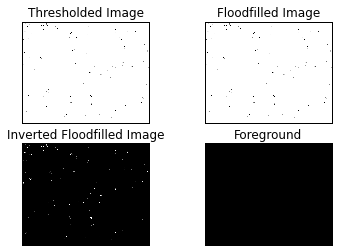

In [35]:
# Read image
im_in = cv2.imread("Image73.tif");

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
im_th = cv2.inRange(im_in, (0,0,0), (255,200,180))

# Copy the thresholded image.
im_floodfill = im_th

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.
plt.subplot(2,2,1), plt.imshow(im_th, cmap='gray')
plt.title("Thresholded Image"), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.imshow(im_floodfill, cmap='gray')
plt.title("Floodfilled Image"), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.imshow(im_floodfill_inv, cmap='gray')
plt.title("Inverted Floodfilled Image"), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4), plt.imshow(im_out, cmap='gray')
plt.title("Foreground"), plt.xticks([]), plt.yticks([])
plt.show()

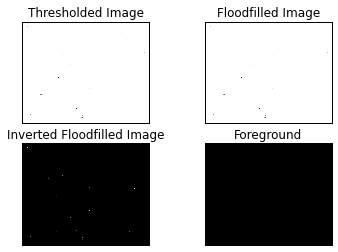

In [43]:
# Read image
im_in = cv2.imread("Image75.tif");

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
im_th = cv2.inRange(im_in, (0,0,0), (255,255,180))

# Copy the thresholded image.
im_floodfill = im_th

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.
plt.subplot(2,2,1), plt.imshow(im_th, cmap='gray')
plt.title("Thresholded Image"), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.imshow(im_floodfill, cmap='gray')
plt.title("Floodfilled Image"), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.imshow(im_floodfill_inv, cmap='gray')
plt.title("Inverted Floodfilled Image"), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4), plt.imshow(im_out, cmap='gray')
plt.title("Foreground"), plt.xticks([]), plt.yticks([])
plt.show()

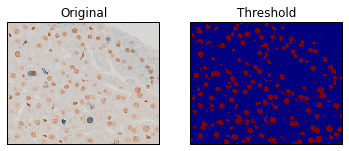

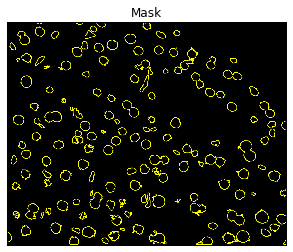

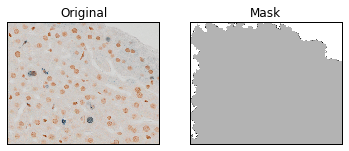

In [37]:
img = cv2.imread("Image75.tif")
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
thresh = cv2.inRange(img, (0,0,0), (255,200,180))
plt.subplot(122), plt.imshow(thresh)
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.show()

c, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntr = []
for i in range(len(c)):
    area = cv2.contourArea(c[i])
    if area > 100:
        cntr.append(c[i])

mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, cntr, -1, (255,255,0), 2)
    
#cv2.imshow("contours", mask)
#cv2.waitKey(-1) 
plt.imshow(mask), plt.title("Mask")
plt.xticks([]), plt.yticks([])
plt.show()
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
kernel = np.zeros((3,3), np.uint8)
erosion = cv2.erode(mask, kernel, iterations = 2)
gray = cv2.cvtColor(erosion, cv2.COLOR_BGR2GRAY)
mask = np.int32(gray)


cv2.watershed(img, mask)
plt.subplot(121), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(mask, cmap = 'gray')
plt.title("Mask"), plt.xticks([]), plt.yticks([])
plt.show()

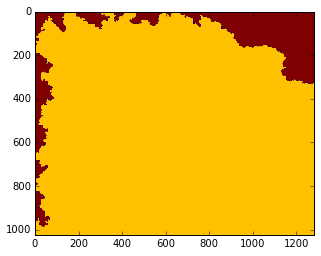

In [38]:
plt.imshow(mask)
plt.show()

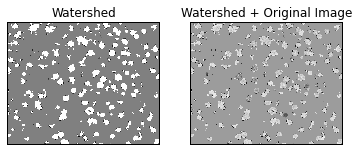

In [39]:
img = cv2.imread('Image73.tif')
thresh = cv2.inRange(img, (0,0,0), (255,200,180))

fg = cv2.erode(thresh,None,iterations = 2)
bgt = cv2.dilate(thresh,None,iterations = 3)
ret,bg = cv2.threshold(bgt,1,128,1)

marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(img,marker32)
m = cv2.convertScaleAbs(marker32)
plt.subplot(1,2,1),plt.imshow(m, cmap = 'gray')
plt.title('Watershed'), plt.xticks([]), plt.yticks([])

cv2.imshow("Watershed", m)
cv2.waitKey(-1)

img = cv2.imread("Image73.tif",0)
new = cv2.bitwise_and(img, m)
cv2.imshow("New", new)
cv2.waitKey(-1)
plt.subplot(1,2,2),plt.imshow(new, cmap='gray')
plt.title('Watershed + Original Image'),plt.xticks([]), plt.yticks([])
plt.show()

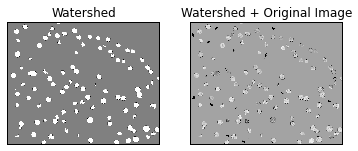

In [40]:
img = cv2.imread('Image75.tif')
thresh = cv2.inRange(img, (0,0,0), (255,200,180))

fg = cv2.erode(thresh,None,iterations = 10)
bgt = cv2.dilate(thresh,None,iterations = 3)
ret,bg = cv2.threshold(bgt,1,128,1)

marker = cv2.add(fg,bg)
marker32 = np.int32(marker)
cv2.watershed(img,marker32)
m = cv2.convertScaleAbs(marker32)
plt.subplot(1,2,1),plt.imshow(m, cmap = 'gray')
plt.title("Watershed"), plt.xticks([]), plt.yticks([])

cv2.imshow("Watershed", m)
cv2.waitKey(-1)

img = cv2.imread("Image75.tif",0)
new = cv2.bitwise_and(img,m)
cv2.imshow("New",new)
cv2.waitKey(-1)

plt.subplot(1,2,2), plt.imshow(new, cmap = 'gray')
plt.title("Watershed + Original Image"), plt.xticks([]), plt.yticks([])
plt.show()

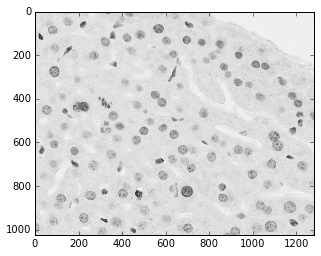

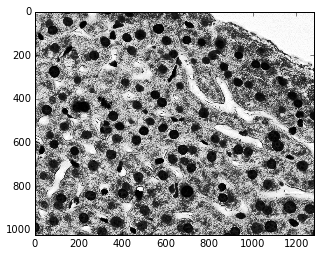

(<matplotlib.image.AxesImage at 0xc45d208>, None)

In [42]:
img = cv2.imread("Image75.tif",0)
plt.imshow(img, cmap = 'gray'), plt.show()
dst = cv2.equalizeHist(img)
plt.imshow(dst, cmap = 'gray'), plt.show()

In [3]:
#------------------Brown Stain Testing----------------------------

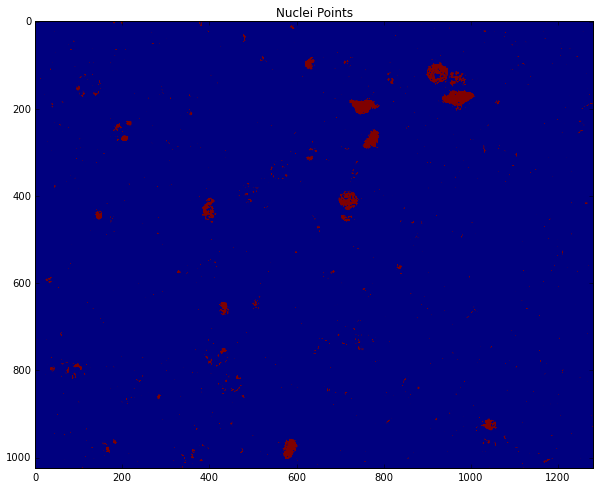

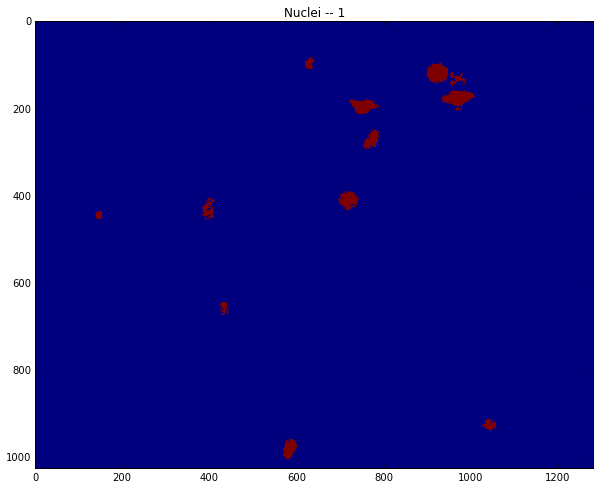

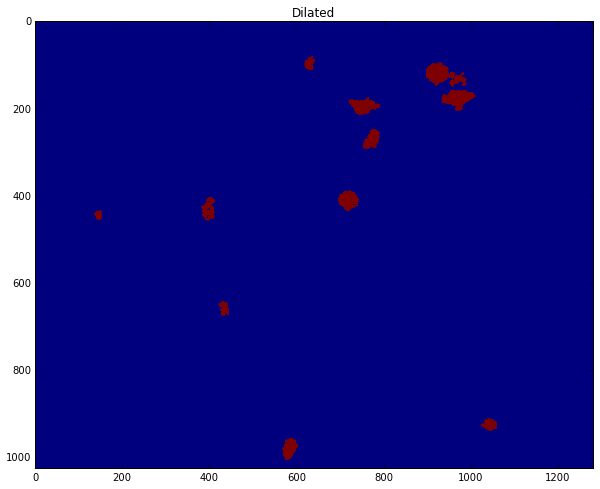

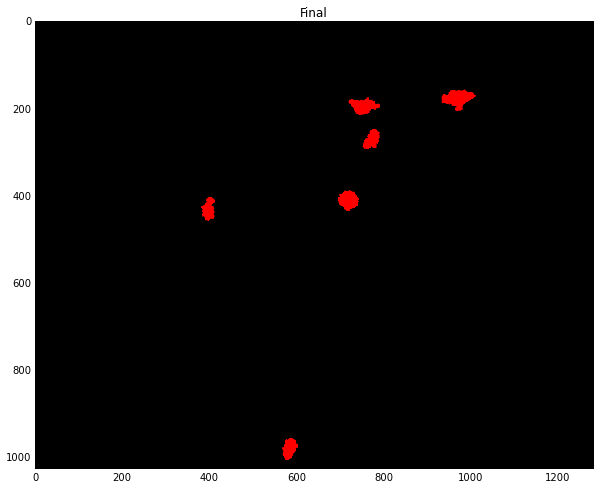

(<matplotlib.image.AxesImage at 0x25631400>,
 None)

In [24]:
img = cv2.imread('Image84.tif')

b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
rg = cv2.merge([r,g,b])
rg = rg.astype(np.float32)

np.seterr(all = 'ignore')
mask = np.empty_like(rg)
arr_max = rg.max(-1)
delta = rg.ptp(-1)
s = delta/arr_max
s[delta==0]=0
idx = (rg[:,:,0] == arr_max)
mask[idx,0] = np.true_divide((rg[idx,1] - rg[idx,2]), delta[idx])
idx = (rg[:,:,1] == arr_max)
mask[idx,0] = 2. + np.true_divide((rg[idx,2] - rg[idx,0]), delta[idx])
idx = (rg[:,:,2] == arr_max)
mask[idx,0] = 4. + np.true_divide((rg[idx,0] - rg[idx,1]), delta[idx])
mask[:,:,0] = ((mask[:,:,0]/6.0)%1.0)*255.0
mask[:,:,0] = np.nan_to_num(mask[:,:,0])
mask[:,:,1] = s * 255.0
mask[:,:,2] = arr_max
mask = mask.astype(np.uint8)

nuclei_points = cv2.inRange(mask, (0,0,0), (180,255,185))
plt.imshow(nuclei_points), plt.title("Nuclei Points"), plt.show()

nuclei = np.zeros(nuclei_points.shape, np.uint8)
cnt, h = cv2.findContours(nuclei_points, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in cnt:
    if cv2.contourArea(c) > 200:
        cv2.drawContours(nuclei, [c], 0, 255, -1)
plt.imshow(nuclei), plt.title("Nuclei -- 1"), plt.show()

kernel = np.ones((3,3), np.uint8)
nuclei = cv2.dilate(nuclei, kernel, iterations = 1)
plt.imshow(nuclei), plt.title("Dilated"), plt.show()

cnt, h = cv2.findContours(nuclei, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
m = np.zeros(mask.shape, np.uint8)
for c in cnt:
    perimeter = cv2.arcLength(c, True)
    if cv2.contourArea(c) > 1000 and (((4*np.pi*cv2.contourArea(c))/(perimeter*perimeter)) >= 0.4):
        cv2.drawContours(m, [c], 0, 255, -1)
plt.imshow(m), plt.title("Final"), plt.show()

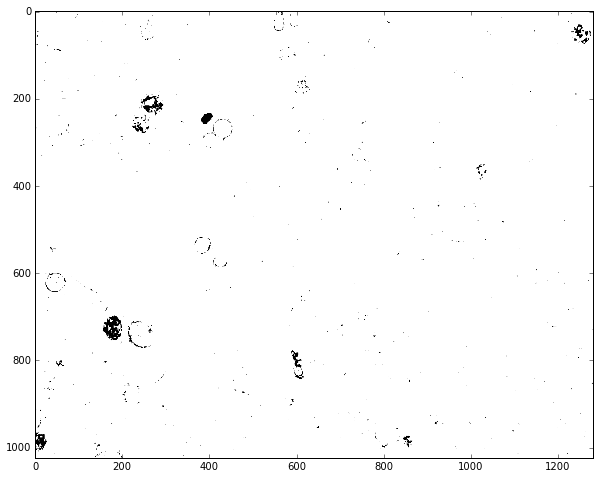

(<matplotlib.image.AxesImage at 0x29a26fd0>, None)

In [27]:
im = cv2.imread("Image81.tif")
b,g,r = cv2.split(im)
rgb_img = cv2.merge([r,g,b])
rg = cv2.merge([r,g,b])
rg = rg.astype(np.float32)

#masking the image

np.seterr(all = 'ignore')
mask = np.empty_like(rg)
arr_max = rg.max(-1)
delta = rg.ptp(-1)
s = delta/arr_max
s[delta==0]=0
idx = (rg[:,:,0] == arr_max)
mask[idx,0] = np.true_divide((rg[idx,1]-rg[idx,2]), delta[idx])
idx = (rg[:,:,1] == arr_max)
mask[idx,0] = 2. + np.true_divide((rg[idx,2]-rg[idx,0]), delta[idx])
idx = (rg[:,:,2] == arr_max)
mask[idx,0] = 4. + np.true_divide((rg[idx,0]-rg[idx,1]), delta[idx])
mask[:,:,0] = ((mask[:,:,0]/6.0)% 1.0)*255.0
mask[:,:,0] = np.nan_to_num(mask[:,:,0])
mask[:,:,1] = s * 255.0
mask[:,:,2] = arr_max
mask=mask.astype(np.uint8)
    
#thresholding the image
    
R = [(100,200),(0,255), (0,185)]
if R[0][0] > R[0][1]:
    m1 = np.logical_or(R[0][0] <= mask[:,:,0], mask[:,:,0] <= R[0][1])
else:
    m1 = np.logical_and(R[0][0] <= mask[:,:,0], mask[:,:,0] <= R[0][1])

if R[1][0] > R[1][1]:
    m2 = np.logical_or(R[1][0] <= mask[:,:,1], mask[:,:,1] <= R[1][1])
else:
    m2 = np.logical_and(R[1][0] <= mask[:,:,1], mask[:,:,1] <= R[1][1])

if R[2][0] > R[2][1]:
    m3 = np.logical_or(R[2][0] <= mask[:,:,2], mask[:,:,2] <= R[2][1])
else:
    m3 = np.logical_and(R[2][0] <= mask[:,:,2], mask[:,:,2] <= R[2][1])

valid = np.logical_and(m1, m2)
valid_range = np.logical_and(valid, m3)
    
mask[valid_range] = 0
mask[np.logical_not(valid_range)] = 255

plt.imshow(mask), plt.show()

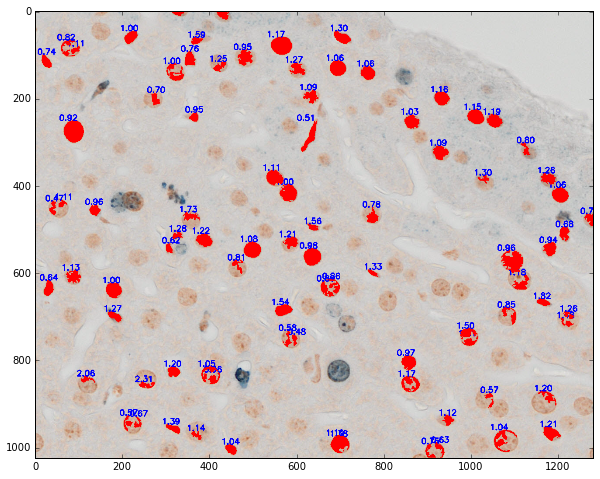

(<matplotlib.image.AxesImage at 0x2f933a90>, None)

In [29]:
img = cv2.imread("Image75.tif")
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
rg = cv2.merge([r,g,b])
rg = rg.astype(np.float32)

#masking the image

np.seterr(all = 'ignore')
mask = np.empty_like(rg)
arr_max = rg.max(-1)
delta = rg.ptp(-1)
s = delta/arr_max
s[delta==0]=0
idx = (rg[:,:,0] == arr_max)
mask[idx,0] = np.true_divide((rg[idx,1]-rg[idx,2]), delta[idx])
idx = (rg[:,:,1] == arr_max)
mask[idx,0] = 2. + np.true_divide((rg[idx,2]-rg[idx,0]), delta[idx])
idx = (rg[:,:,2] == arr_max)
mask[idx,0] = 4. + np.true_divide((rg[idx,0]-rg[idx,1]), delta[idx])
mask[:,:,0] = ((mask[:,:,0]/6.0)% 1.0)*255.0
mask[:,:,0] = np.nan_to_num(mask[:,:,0])
mask[:,:,1] = s * 255.0
mask[:,:,2] = arr_max
mask=mask.astype(np.uint8)

thresh = cv2.inRange(mask, (140,80,120),(180,255,210))
#plt.imshow(thresh, cmap = 'gray'), plt.show()

cnt, h = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for c in cnt:
    perimeter = cv2.arcLength(c, True)
    if cv2.contourArea(c) >= 150: # and ((4*np.pi*cv2.contourArea(c))/(perimeter*perimeter) <= 0.8):
        cv2.drawContours(img, [c], 0, 255, -1)
        ((x,y), r) = cv2.minEnclosingCircle(c)
        x,y,w,h = cv2.boundingRect(c)
        cv2.putText(img, "{0:.2f}".format(float(w)/h), (int(x)-10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255),2)
        
plt.imshow(img), plt.show()